In [1]:
import csv
from preprocess_helpers import myPreprocessed
import numpy as np
import matplotlib.pyplot as pp
from helper import get_name_of_feature
import os


In [2]:
X_np, Y_logits, changing_vars, static_vars = myPreprocessed()
seq_len = X_np.shape[1]
seq_len

6

In [3]:
dir = "/workdir/optimal-summaries-public/vasopressor/models/mimic-iii/vasopressor-full-ts/"
dir_top_k = dir + "top-k/"

if not os.path.exists(dir_top_k):
    os.makedirs(dir_top_k)

In [4]:
num_concepts = 4
rand = 1
# get top features for a set number of concepts
greedy_result = []
with open(dir_top_k + 'bottleneck_r{}_c{}_topkinds.csv'.format(rand, num_concepts), mode ='r') as file:
    # reading the CSV file
    csvFile = csv.reader(file)
    header = next(csvFile)
    for row in csvFile:
        greedy_result.append(np.array(row, dtype=float))
greedy_result = np.array(greedy_result)
header

['Score', 'ID', 'Concept']

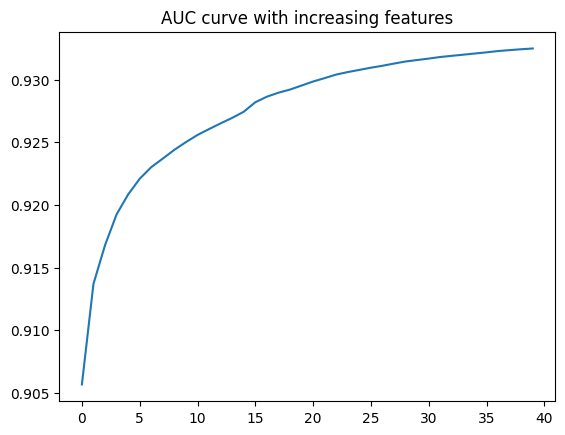

In [5]:
pp.plot(greedy_result[:, 0])
pp.title("AUC curve with increasing features")
pp.show()

In [6]:
greedy_result = greedy_result[greedy_result[:, 2].argsort()]

for i, (auc, ind, concept) in enumerate(greedy_result):
    print(f"Concept {int(concept)}: " + str(get_name_of_feature(int(ind), changing_vars, seq_len, static_vars)))


Concept 0: ('ast', 'mean of indicators')
Concept 0: ('potassium', 'slope')
Concept 1: ('alt', '# switches')
Concept 1: ('alt', 'slope')
Concept 1: ('magnesium_ind_time_3', 'raw')
Concept 1: ('spo2', 'hours above threshold')
Concept 1: ('temp', 'first time measured')
Concept 1: ('glucose', 'hours above threshold')
Concept 1: ('inr', '# switches')
Concept 1: ('GCS_ind_time_3', 'raw')
Concept 1: ('magnesium_ind_time_5', 'raw')
Concept 1: ('creatinine_time_2', 'raw')
Concept 1: ('hgb', 'slope')
Concept 1: ('po2', '# switches')
Concept 1: ('bilirubin_total', 'slope')
Concept 1: ('inr', 'hours above threshold')
Concept 1: ('bilirubin_total', 'hours below threshold')
Concept 1: ('bun', 'var of indicators')
Concept 1: ('temp_time_5', 'raw')
Concept 1: ('inr', 'hours below threshold')
Concept 1: ('map', 'hours above threshold')
Concept 1: ('is_csru', 'raw')
Concept 1: ('pco2', 'mean')
Concept 1: ('ast_time_1', 'raw')
Concept 1: ('creatinine', 'hours above threshold')
Concept 1: ('po2_ind_time_4